In [2]:
import numpy as np
import matplotlib.pyplot as plt

Реализуем функцию для подсчета многочлена методом Горнера:

In [3]:
def calc_polynom_gorner(coefs, x_0):
    b_i = coefs[0]
    for i in range(1, len(coefs)):
        b_i = coefs[i] + b_i * x_0
    return b_i

In [4]:
coefs = [ 1., -18.,  144., -672,  2016., -4032.,  5376., -4608., 2304., -512.]
polynom = np.vectorize(lambda x: calc_polynom_gorner(coefs, x))

In [5]:
grid = np.linspace(1.92, 2.08, 1000)

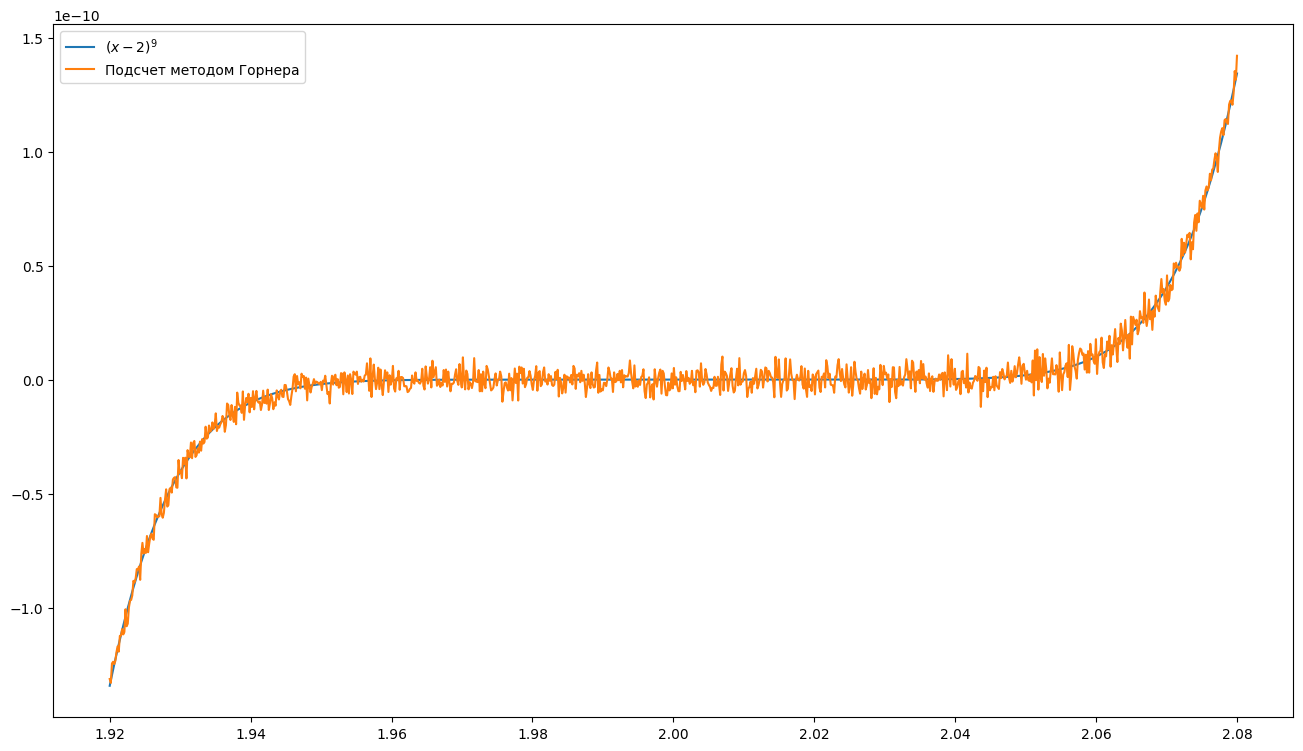

In [6]:
plt.figure(figsize=(16, 9))
plt.plot(grid, (grid - 2) ** 9, label='$(x-2)^9$')
plt.plot(grid, polynom(grid), label='Подсчет методом Горнера')
plt.legend()
plt.show()

Посмотрим на максимальную ошибку:

In [8]:
np.max(np.abs((grid - 2) ** 9 -  polynom(grid)))

1.2511616606663163e-11

Теперь приведем теоритические рассуждения, чтобы оенить ошибку:
$$
b_n = a_n
b_{n-1} - (a_{n-1} + b_nx_0(1 + \delta)) * (1 + \delta) = a_{n-1} (1 + \delta) + a_nx_0 (1 + \delta)^2
b_{n-2} = (a_{n-1} + b_{n-1}x_0(1 + \delta))(1 + \delta) = a_{n-2} (1 + \delta) + a_{n-1}x_0(1 + \delta)^3 + a_nx_0^2(1 + \delta)^4
$$
Отсюда по индукции видно, что 
$$
b_0 = a_nx_0^{2n} + \sum_{i = 0}^{n - 1} {a_ix_0^{i}(1 + \delta)^{2i + 1}}
$$
Напомним, что 
$$
(1 + \delta)^n \leq 1 + n\varepsilon + O(\varepsilon^2)
$$
и
$$
(1 + \delta)^n \geq 1 - n\varepsilon
$$
Значит,
$$
|f(x_0) - b_0| \leq 2 n^2\varepsilon
$$
Для $\varepsilon = 10^{-8}$ получаем порядок ошибки оценивается $10^{-6}$.
Как видим, у нас максимальная ошибка меньше, чем полученная оценка, как и ожидалось
